In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer=load_breast_cancer()

Xtrain,Xtest,ytrain,ytest=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=56)

#print(cancer.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [4]:
forest=RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [6]:
print('Accuracy of Random Forest on train set: {:.3f}'.format(forest.score(Xtrain,ytrain)*100))
print('Accuracy of Random Forest on test set: {:.3f}'.format(forest.score(Xtest,ytest)*100))

Accuracy of Random Forest on train set: 100.000
Accuracy of Random Forest on test set: 97.203


Checking the feature importance:

Text(0, 0.5, 'Features')

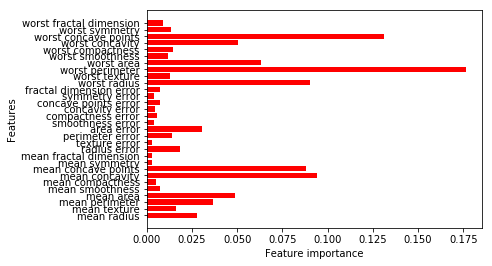

In [21]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

n_features=cancer.data.shape[1]
plt.barh(range(n_features),forest.feature_importances_,align='center',color='red')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Features')


In [ ]:
Let's see the effect of prun

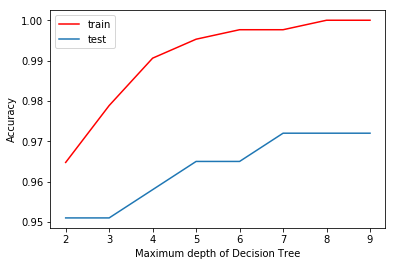

In [54]:
train_accuracy=[]
test_accuracy=[]

depth_range=range(2,10)

for i in depth_range:
    classifier=RandomForestClassifier(max_depth=i,random_state=56,n_estimators=100)
    classifier.fit(Xtrain,ytrain)
    train_accuracy.append(classifier.score(Xtrain,ytrain))
    test_accuracy.append(classifier.score(Xtest,ytest))
    
plt.plot(depth_range,train_accuracy,label='train',color='red')
plt.plot(depth_range,test_accuracy,label='test')
plt.xlabel('Maximum depth of Decision Tree')
plt.ylabel('Accuracy')
plt.legend()

45
